In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import dataset

In [8]:
df = pd.read_csv('/content/ncr_ride_bookings.csv')

In [9]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [10]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [12]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [13]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.dtypes

,0
Date,object
Time,object
Booking ID,object
Booking Status,object
Customer ID,object
Vehicle Type,object
Pickup Location,object
Drop Location,object
Avg VTAT,float64
Avg CTAT,float64


In [16]:
df.shape

(150000, 21)

In [17]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

## Data visualizations

In [18]:
# Convert Date & Time
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time


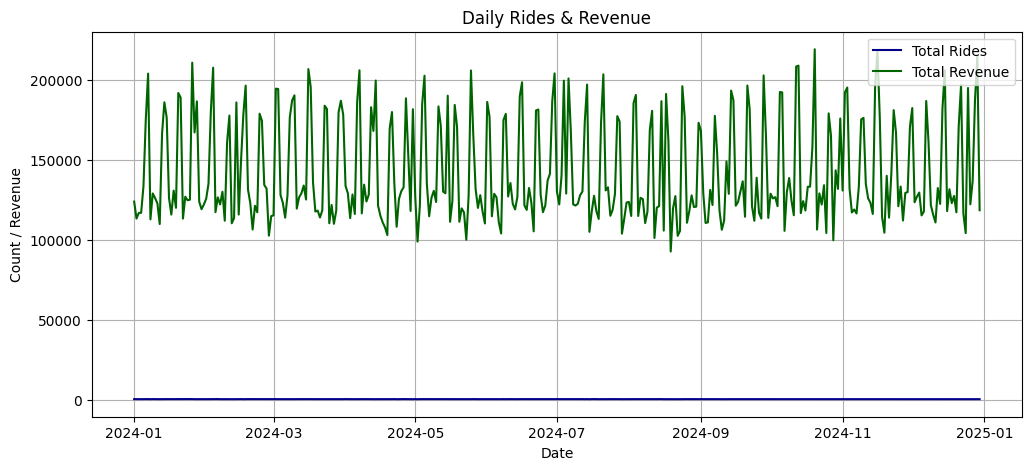

In [19]:
# 1️⃣ Time-series: Total Rides & Revenue Over Time
daily_stats = df.groupby('Date').agg({'Booking ID':'count', 'Booking Value':'sum'}).reset_index()
plt.figure(figsize=(12,5))
plt.plot(daily_stats['Date'], daily_stats['Booking ID'], label="Total Rides", color='darkblue')
plt.plot(daily_stats['Date'], daily_stats['Booking Value'], label="Total Revenue", color='darkgreen')
plt.title("Daily Rides & Revenue")
plt.xlabel("Date")
plt.ylabel("Count / Revenue")
plt.legend()
plt.grid(True)
plt.show()


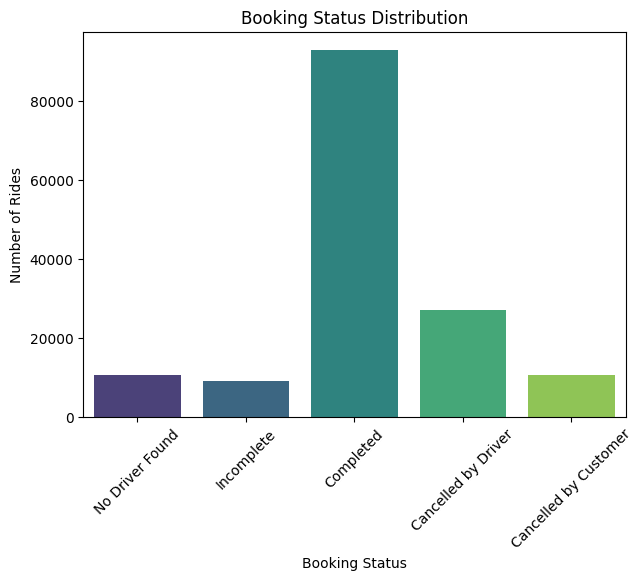

In [20]:
# 2️⃣ Booking Status Breakdown
plt.figure(figsize=(7,5))
sns.countplot(x='Booking Status', data=df, palette='viridis')
plt.title("Booking Status Distribution")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

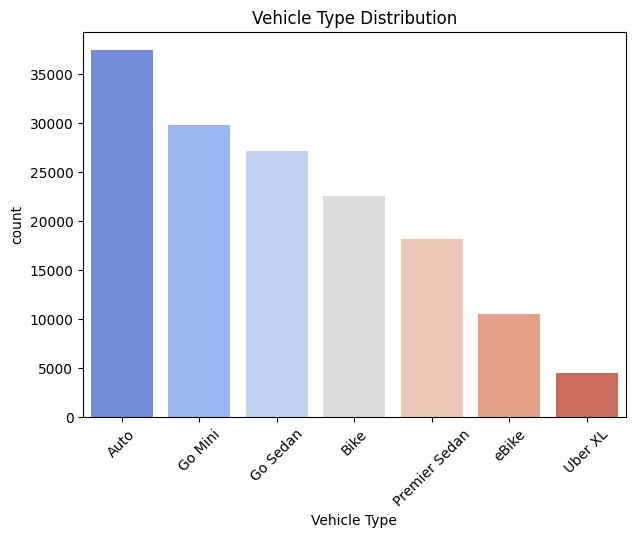

In [21]:
# 3️⃣ Vehicle Type Usage
plt.figure(figsize=(7,5))
sns.countplot(x='Vehicle Type', data=df, order=df['Vehicle Type'].value_counts().index, palette='coolwarm')
plt.title("Vehicle Type Distribution")
plt.xticks(rotation=45)
plt.show()

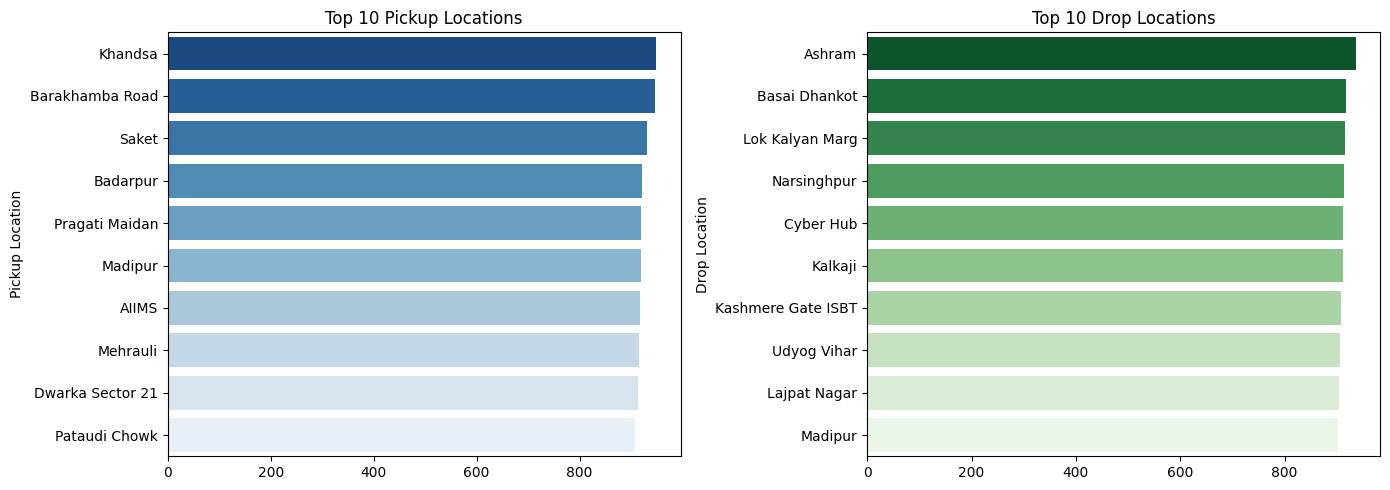

In [22]:
# 4️⃣ Top 10 Pickup & Drop Locations
top_pickups = df['Pickup Location'].value_counts().head(10)
top_drops = df['Drop Location'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=axes[0], palette='Blues_r')
axes[0].set_title("Top 10 Pickup Locations")
sns.barplot(x=top_drops.values, y=top_drops.index, ax=axes[1], palette='Greens_r')
axes[1].set_title("Top 10 Drop Locations")
plt.tight_layout()
plt.show()

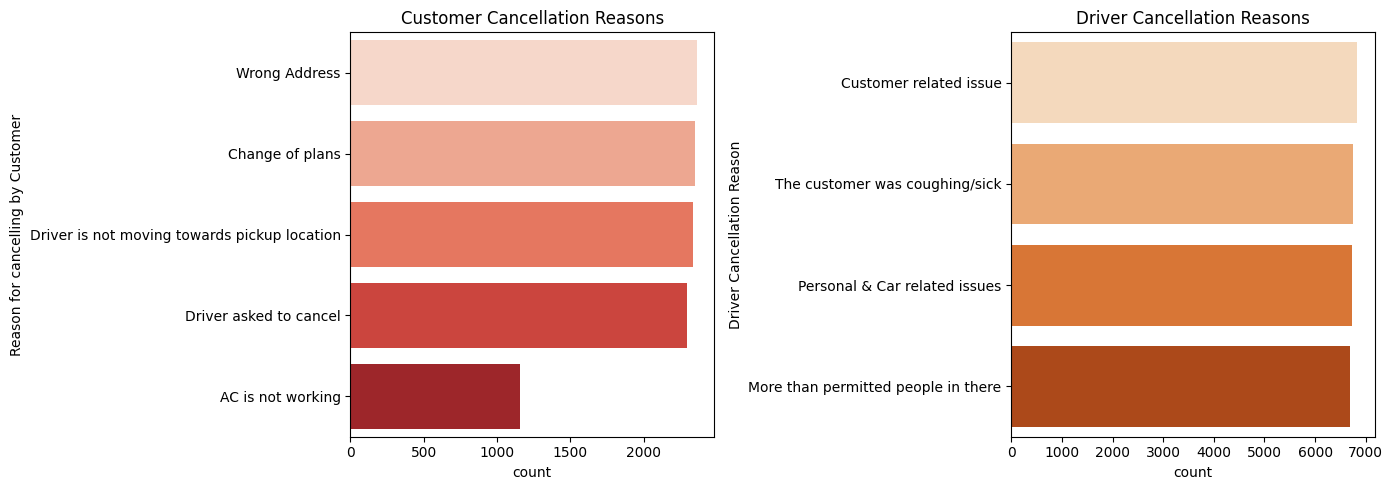

In [23]:
# 5️⃣ Cancellation Reasons (Customer & Driver)
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(y='Reason for cancelling by Customer', data=df, order=df['Reason for cancelling by Customer'].value_counts().index, ax=axes[0], palette='Reds')
axes[0].set_title("Customer Cancellation Reasons")
sns.countplot(y='Driver Cancellation Reason', data=df, order=df['Driver Cancellation Reason'].value_counts().index, ax=axes[1], palette='Oranges')
axes[1].set_title("Driver Cancellation Reasons")
plt.tight_layout()
plt.show()

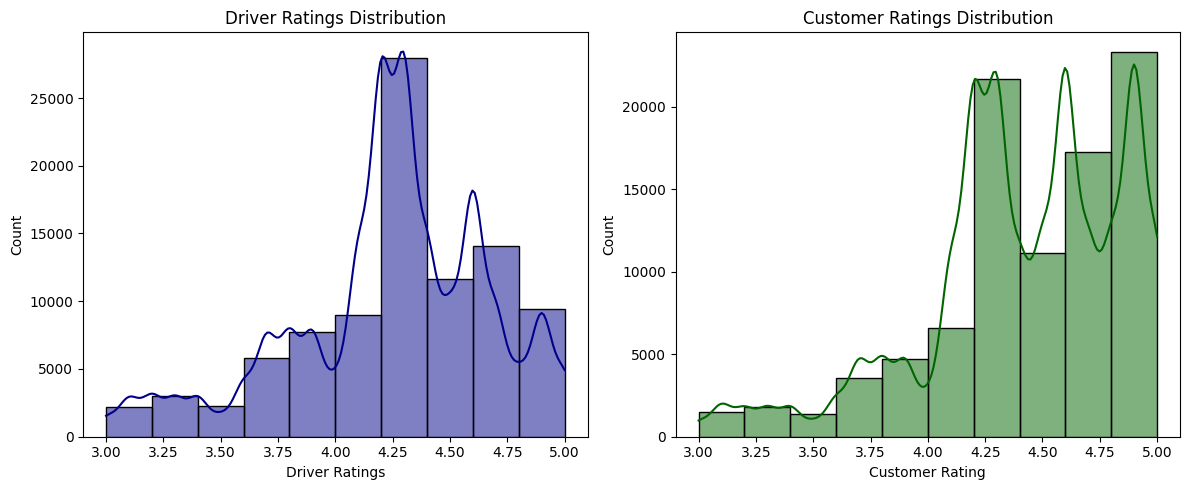

In [24]:
# 6️⃣ Rating Distributions (Driver & Customer)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['Driver Ratings'], bins=10, kde=True, ax=axes[0], color='darkblue')
axes[0].set_title("Driver Ratings Distribution")
sns.histplot(df['Customer Rating'], bins=10, kde=True, ax=axes[1], color='darkgreen')
axes[1].set_title("Customer Ratings Distribution")
plt.tight_layout()
plt.show()

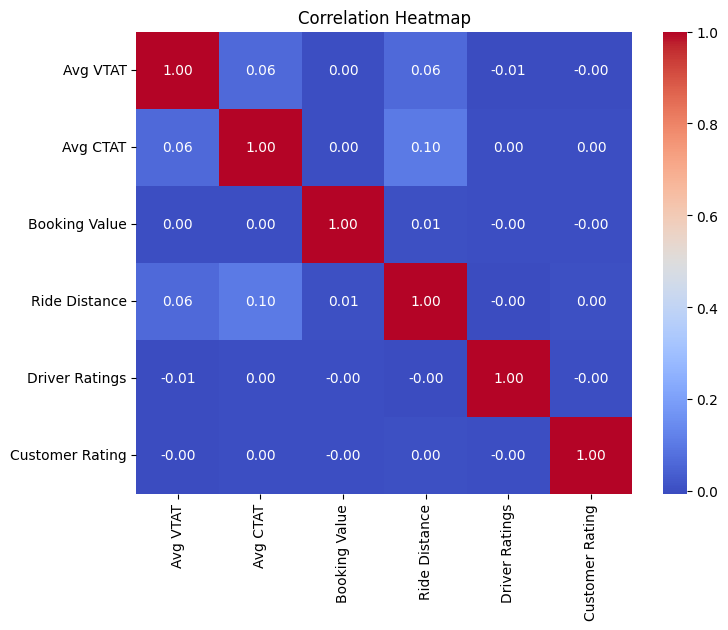

In [25]:
# 7️⃣ Correlation Heatmap
num_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Predictive modeling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [27]:
# Convert date and time to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Extract useful date & time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

# Drop original date/time columns
df = df.drop(columns=['Date', 'Time'])

# Fill missing values
df = df.fillna("Unknown")

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object' or isinstance(df[col].iloc[0], str):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Define features & target
target_col = "Booking Status"
X = df.drop(target_col, axis=1)
y = df[target_col]

# Scale numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


                 Model  Accuracy (%)
0  Logistic Regression        100.00
1        Decision Tree        100.00
2        Random Forest        100.00
3          Naive Bayes        100.00
4                  SVM        100.00
5                  KNN         99.96
6              XGBoost        100.00


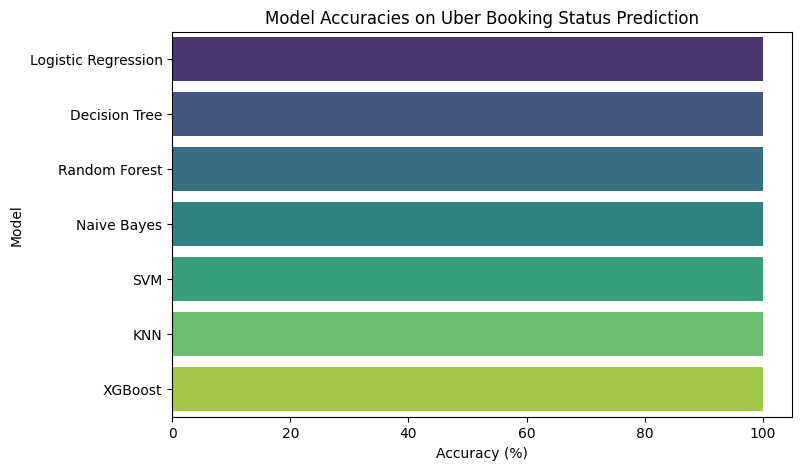

In [28]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Try importing XGBoost if available
try:
    from xgboost import XGBClassifier
    models["XGBoost"] = XGBClassifier(eval_metric='mlogloss')
except ImportError:
    print("XGBoost not installed, skipping...")

# Train & evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100
    accuracies[name] = round(acc, 2)

# Show results
results_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy (%)"])
print(results_df)

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy (%)", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracies on Uber Booking Status Prediction")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.show()